In [15]:
# importing necessary libraries
import numpy as np
import math
import pandas as pd
import csv
import matplotlib.pyplot as plt
# ! pip install tabulate
from tabulate import tabulate
from numpy import *
from collections import Counter
import seaborn as sn
import random
import os
import pydot

In [23]:
cwd = os.getcwd() 

print(cwd)
csvFile = "..\data\original\data.csv"
df = pd.read_csv(csvFile)
data = df.values
dataFeatures = df.columns
print(dataFeatures)
df

c:\Users\Deividas Mozuraitis\Documents\Erasmus\Data Mining Group Project\team3-data-mining\src
Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit bef

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [24]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [25]:
df.mode()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.0,0.490128,0.559693,0.538787,0.598956,0.602589,0.998987,0.797381,0.809309,0.303517,...,0.000000,0.003661,0.000000,0.665149,0.000000,0.000000,0.026791,0.565158,1.0,0.000000
1,NaN,NaN,0.568251,0.551475,0.601976,0.604715,NaN,NaN,0.809378,0.303526,...,0.224792,NaN,0.408682,NaN,0.344652,0.133503,NaN,NaN,NaN,0.003946
2,NaN,NaN,NaN,0.552492,0.605796,0.605796,NaN,NaN,NaN,0.303528,...,0.411809,NaN,0.419045,NaN,0.442176,0.182790,NaN,NaN,NaN,0.008500
3,NaN,NaN,NaN,0.558220,0.606495,NaN,NaN,NaN,NaN,NaN,...,0.412621,NaN,0.528279,NaN,0.634587,0.199162,NaN,NaN,NaN,0.008753
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.420995,NaN,0.531839,NaN,0.637576,0.209222,NaN,NaN,NaN,0.008950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.944328,NaN,0.792048,NaN,0.902744,0.484318,NaN,NaN,NaN,0.798122
6815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.959320,NaN,0.797385,NaN,0.916329,0.643692,NaN,NaN,NaN,0.881018
6816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.981315,NaN,0.841360,NaN,0.976180,0.652347,NaN,NaN,NaN,0.920638
6817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.982879,NaN,0.956387,NaN,0.996912,0.745352,NaN,NaN,NaN,0.942729


In [27]:
df.isnull()
print(" \nCount total NaN at each column in a DataFrame : \n\n",)
df_nan = (df.isnull().sum())
print("In total null values:", sum(df_nan))

 
Count total NaN at each column in a DataFrame : 


In total null values: 0


Original Box Plot


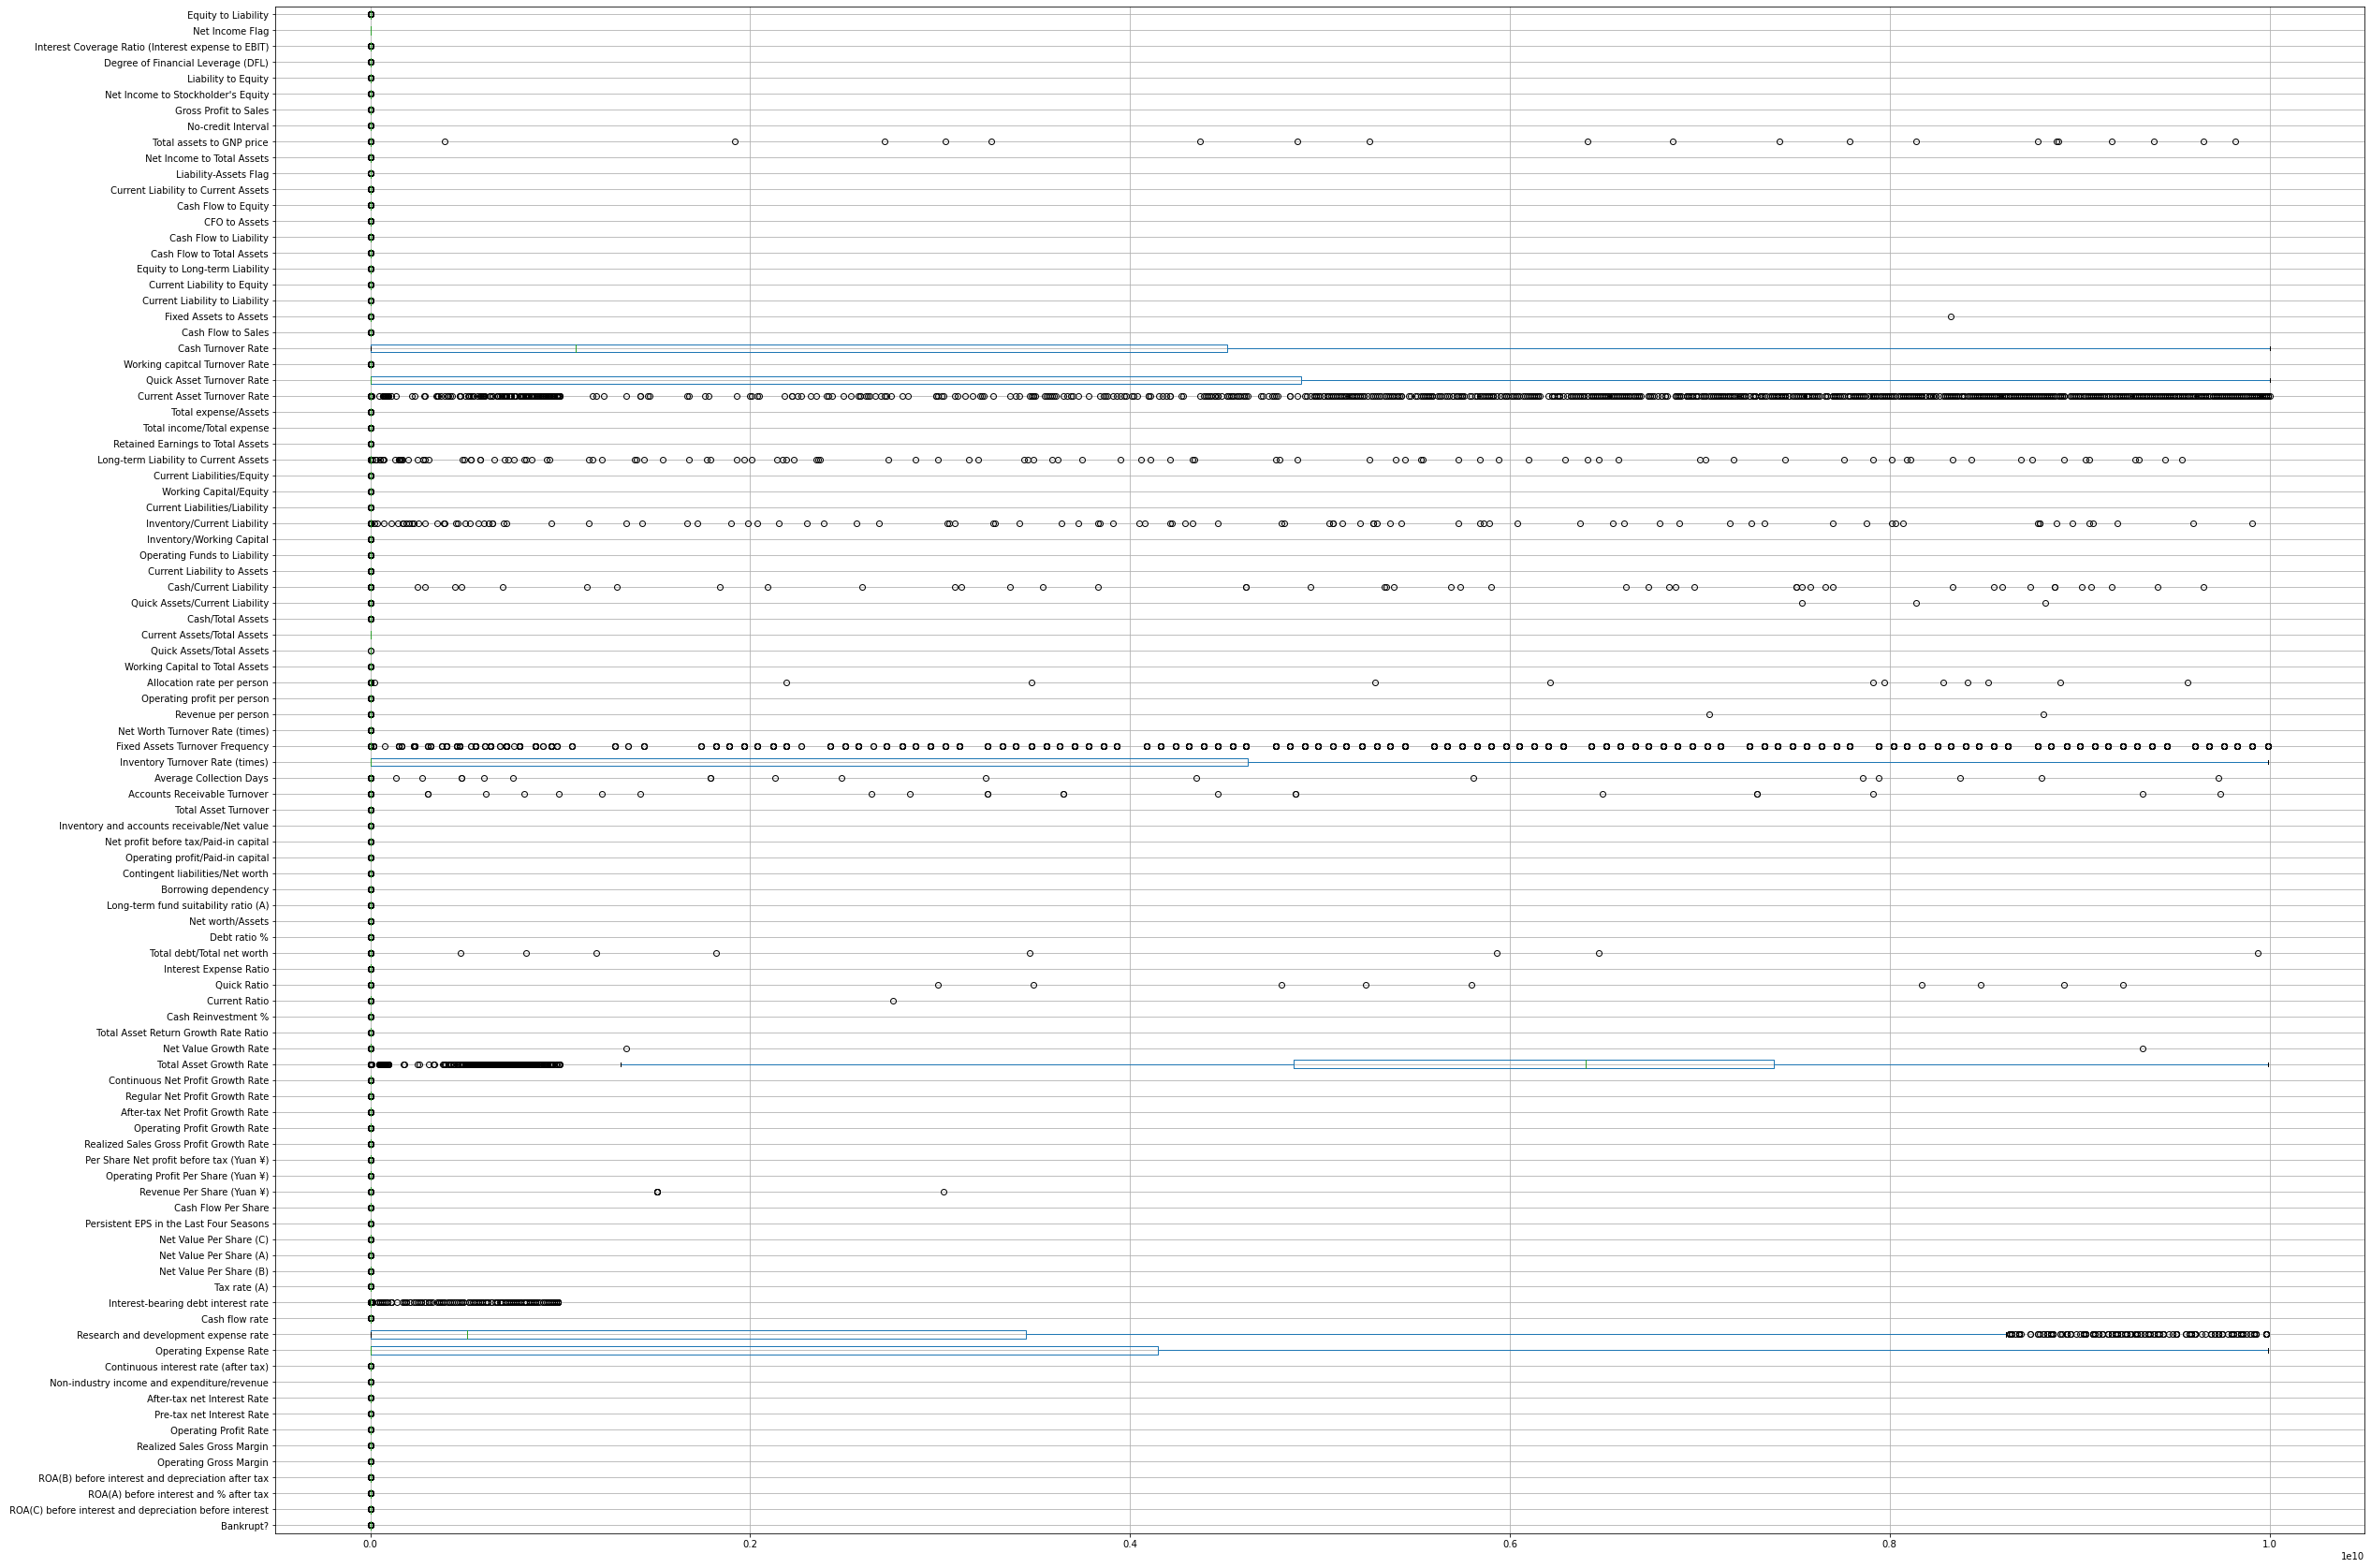

In [28]:

plt.rcParams["figure.figsize"] = (40,30)
print('Original Box Plot')
df.boxplot(vert=False)



plt.show()


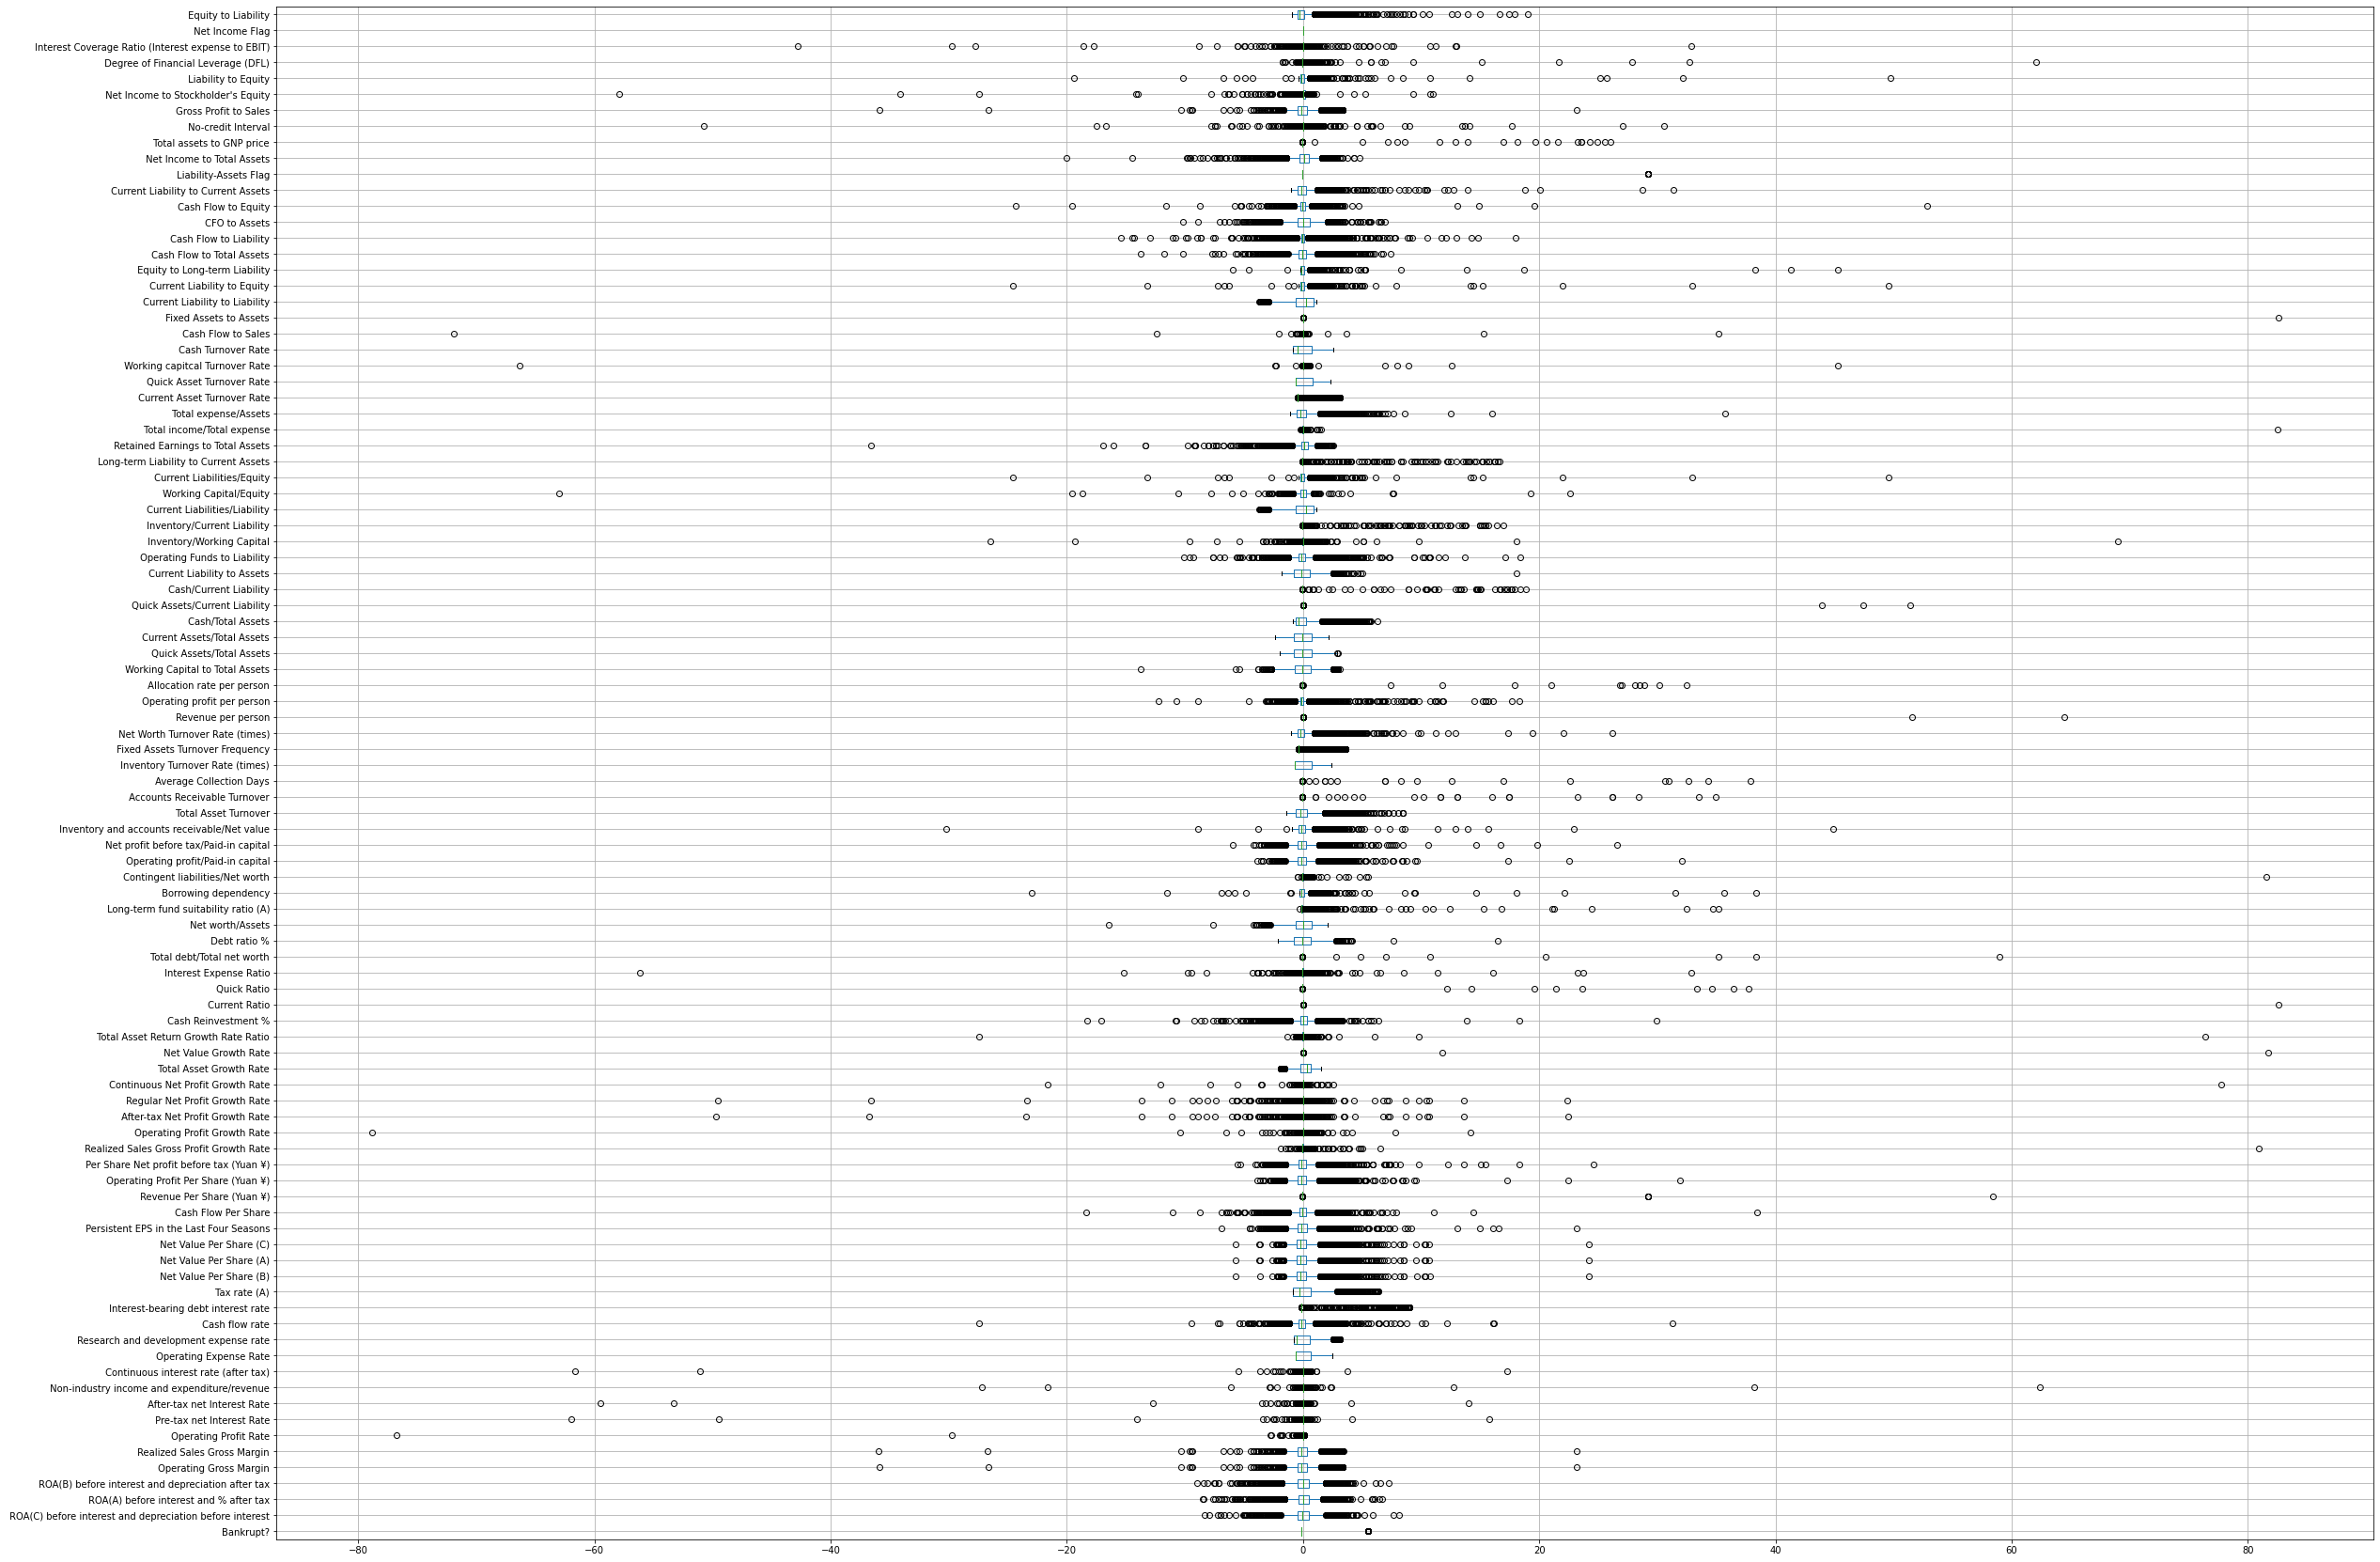

In [ ]:
normalized_df=(df-df.mean())/df.std()

normalized_df.boxplot(vert=False)

plt.show()

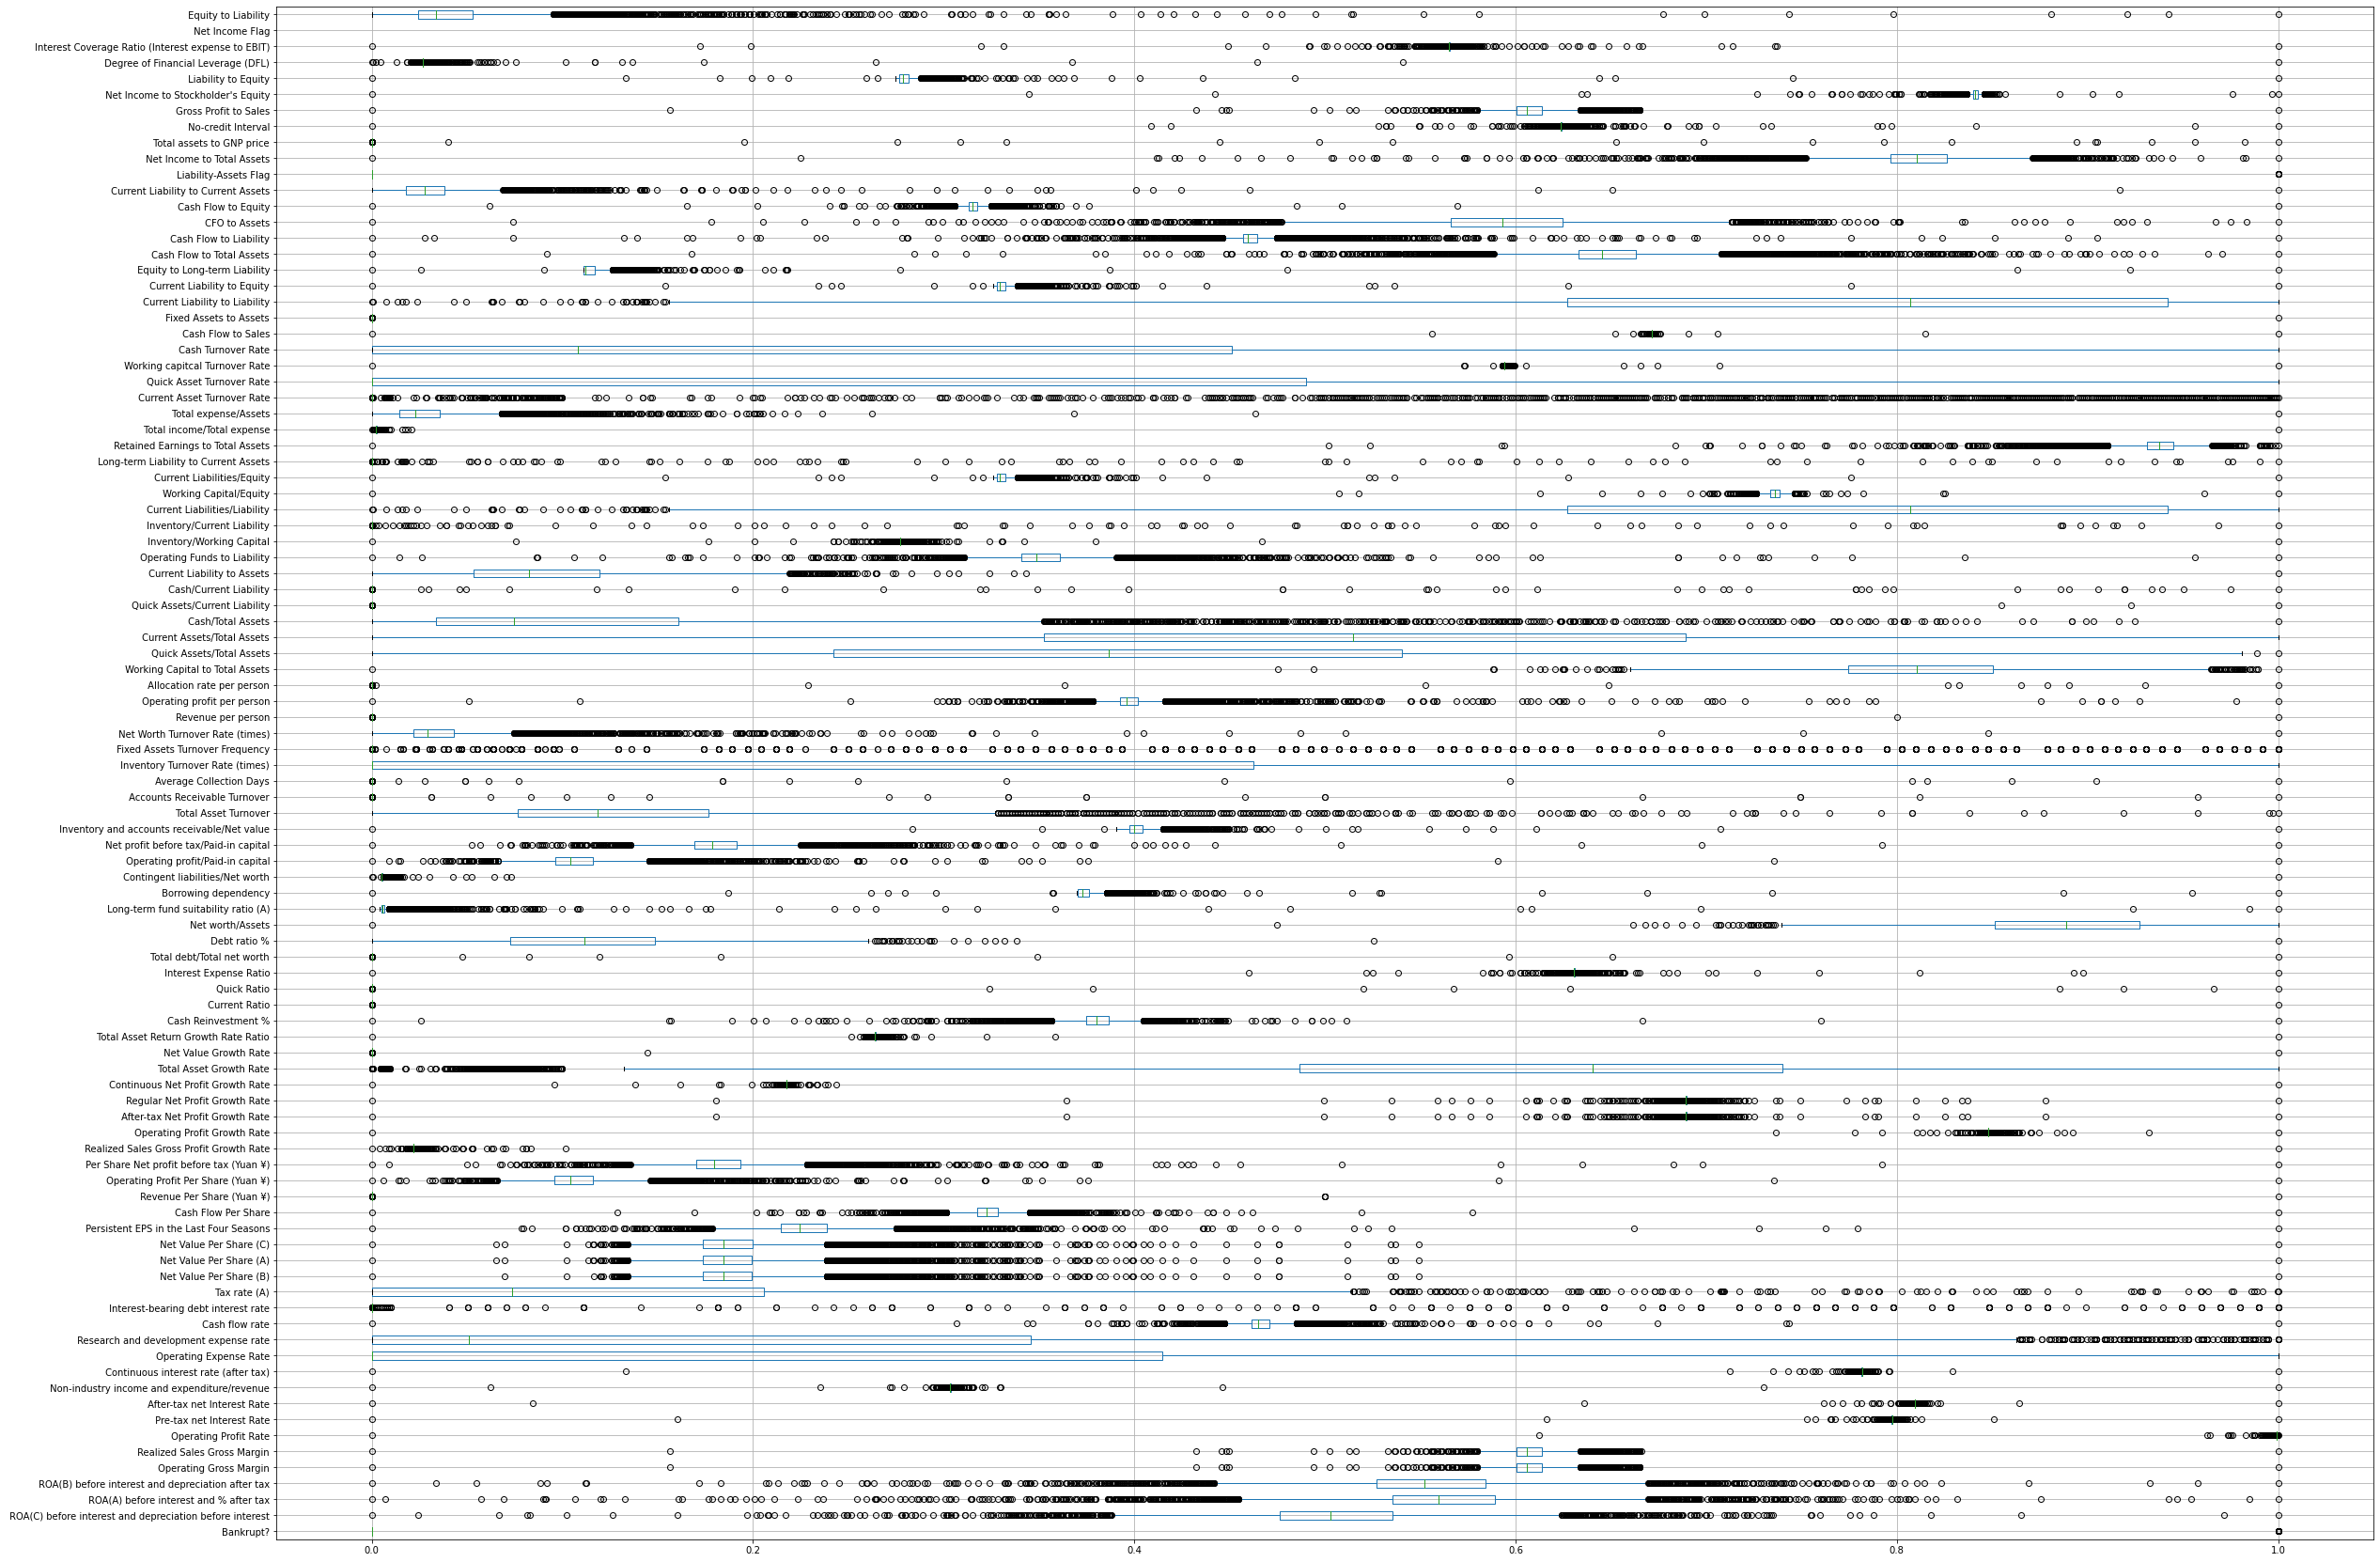

In [29]:
normalized_df=(df-df.min())/(df.max()-df.min())

normalized_df.boxplot(vert=False)

plt.show()

array([[<AxesSubplot:title={'center':'Bankrupt?'}>,
        <AxesSubplot:title={'center':' ROA(C) before interest and depreciation before interest'}>,
        <AxesSubplot:title={'center':' ROA(A) before interest and % after tax'}>,
        <AxesSubplot:title={'center':' ROA(B) before interest and depreciation after tax'}>,
        <AxesSubplot:title={'center':' Operating Gross Margin'}>,
        <AxesSubplot:title={'center':' Realized Sales Gross Margin'}>,
        <AxesSubplot:title={'center':' Operating Profit Rate'}>,
        <AxesSubplot:title={'center':' Pre-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' After-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' Non-industry income and expenditure/revenue'}>],
       [<AxesSubplot:title={'center':' Continuous interest rate (after tax)'}>,
        <AxesSubplot:title={'center':' Operating Expense Rate'}>,
        <AxesSubplot:title={'center':' Research and development expense rate'}>,
        <AxesSubp

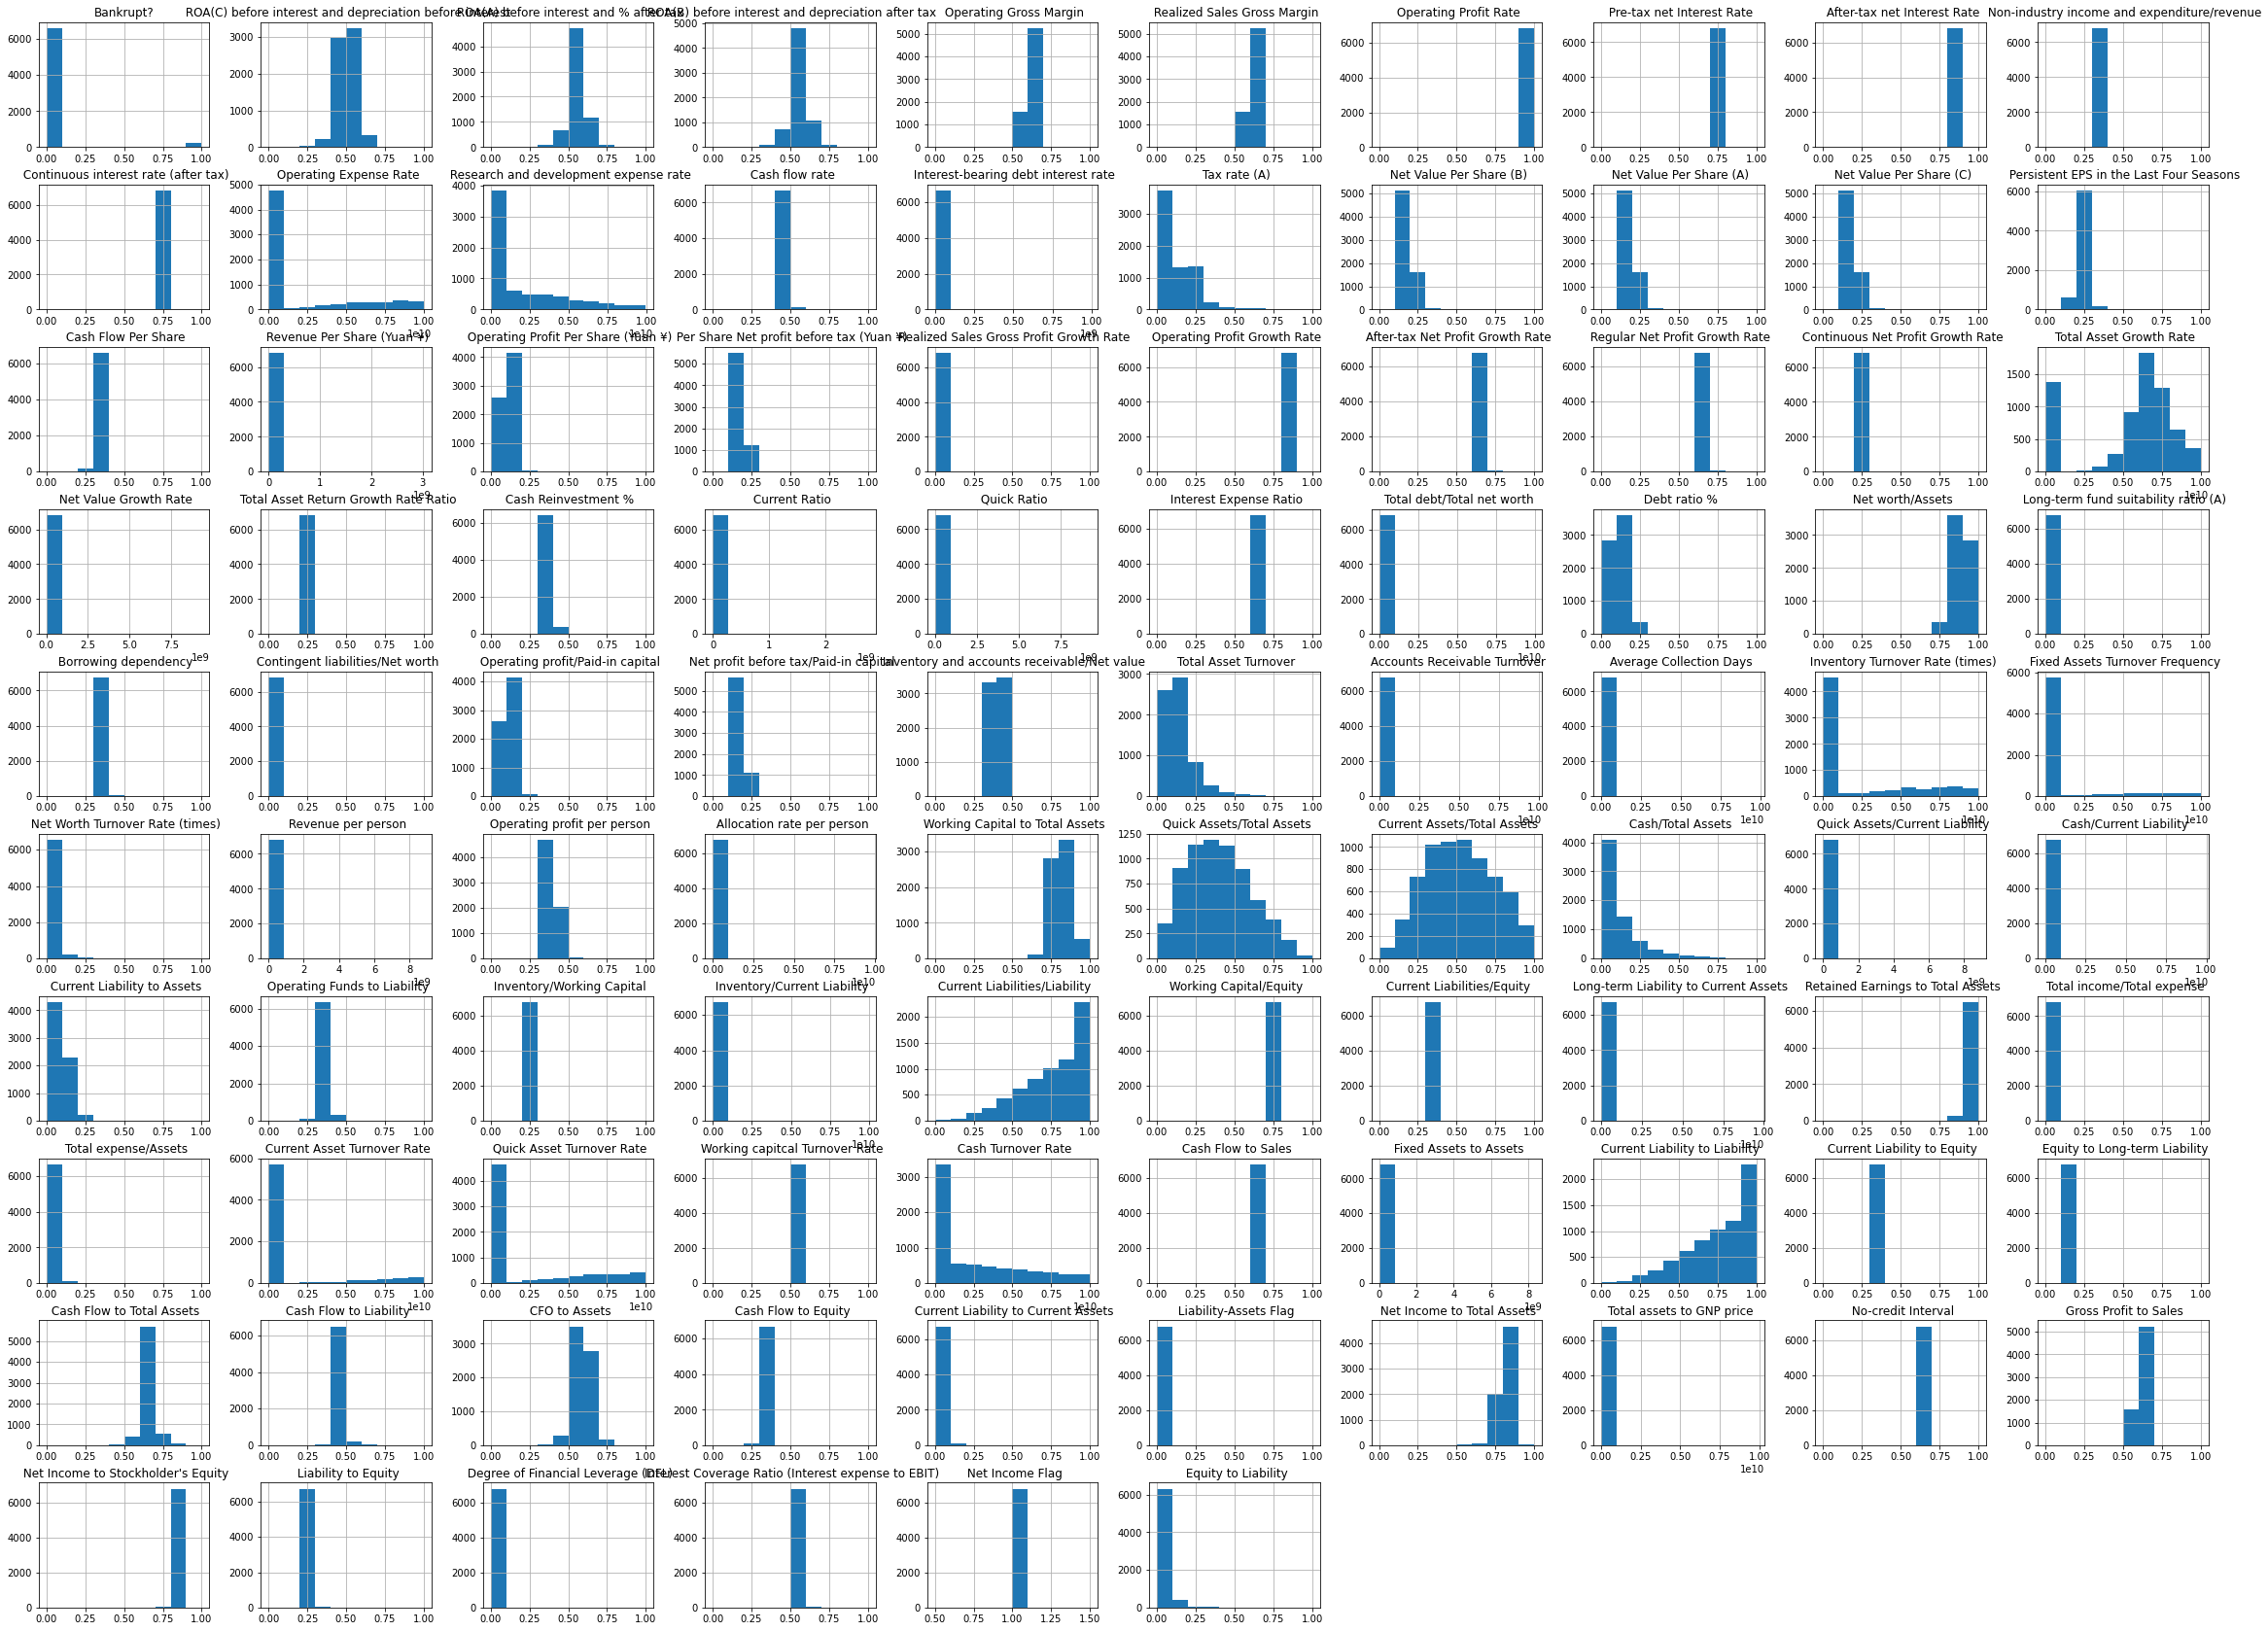

In [30]:
df.hist()